# Import Modules 

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('realtor-data.zip.csv')

In [4]:
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [6]:
data.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [7]:
data.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [8]:
# Remove Un-usable columns
# data.drop(columns = ['brokered_by', 'zip_code', 'prev_sold_date']) Its gives error during run this code 2nd tiime because these columns are no further exists in data

In [9]:
data.shape # Shows row and columns

(2226382, 12)

In [10]:
# Check total null values in data
data.isna().sum().sum()

np.int64(2640112)

In [11]:
# Remove all null value from data
data.dropna(inplace=True)

In [12]:
# Now recheck the null values in data
data.isna().sum().sum()

np.int64(0)

In [13]:
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12


In [14]:
# Check for duplicate values in data

data.duplicated().sum()

np.int64(0)

In [15]:
# Remove all duplicate values from data
data.drop_duplicates(inplace=True)

In [16]:
# Data points left in data 
data.shape

(1084909, 12)

In [17]:
# count values of status column
data['status'].value_counts()

status
sold        606926
for_sale    477983
Name: count, dtype: int64

In [18]:
# Plotting 
import matplotlib.pyplot as plt 

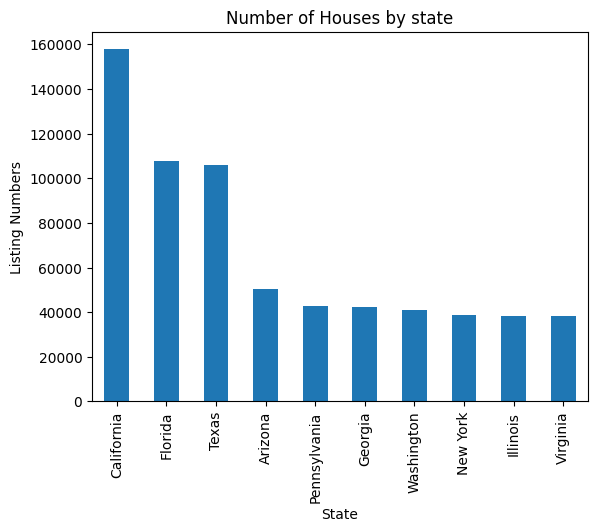

In [19]:
# count values of state column
data['state'].value_counts().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title("Number of Houses by state")
plt.xlabel("State")
plt.ylabel("Listing Numbers")
plt.show()

In [20]:
# Show Data
data 

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [21]:
# Group State and Price in in column
data.groupby('state')['price'].mean().sort_values(ascending = False).astype(int)

state
Hawaii                  1457250
Virgin Islands          1291675
District of Columbia    1188105
California              1079507
Utah                     862922
Colorado                 808673
Connecticut              792832
Nevada                   734784
Washington               717093
Massachusetts            702756
Montana                  683083
Florida                  641794
Oregon                   622027
New Hampshire            609501
Idaho                    600022
New York                 590684
Puerto Rico              573611
Wyoming                  556509
Virginia                 547965
Arizona                  542448
New Jersey               520062
South Carolina           506937
Maryland                 495773
Alaska                   494244
Maine                    490554
Rhode Island             468721
Vermont                  467501
Tennessee                451138
Texas                    434830
North Carolina           426309
Georgia                  403225
De

In [22]:
# Group City and Price in in column 
data.groupby('city')['price'].mean().sort_values(ascending  = False).astype(int)

city
Bal Harbour        26585714
Carpinteria        25453769
Gulf Stream        21461250
Palm Beach         18787650
Montecito          17982187
                     ...   
Melbeta               12000
Center Junction        8500
Red House              7500
Rowan                  7500
Pilot Mound            6500
Name: price, Length: 15103, dtype: int64

In [23]:
# Group City and Price in in column 
data.groupby(["state", "city"])["price"].mean().reset_index()

,state,city,price
0,Alabama,Abbeville,2.057182e+05
1,Alabama,Adamsville,1.459324e+05
2,Alabama,Adger,1.531333e+05
3,Alabama,Akron,4.499333e+05
4,Alabama,Alabaster,2.644765e+05
...,...,...,...
22665,Wyoming,Thermopolis,4.046750e+05
22666,Wyoming,Torrington,2.269800e+05
22667,Wyoming,Wheatland,2.440833e+05
22668,Wyoming,Wilson,4.200000e+06


In [24]:
data

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [25]:
# Calculate Correlations
data.select_dtypes(include = "number").corr()['price']


brokered_by   -0.011903
price          1.000000
bed            0.205024
bath           0.373092
acre_lot       0.000815
street         0.002597
zip_code       0.092658
house_size     0.187705
Name: price, dtype: float64

# Modeling

In [26]:
# Select Features(X)
X = data[["bed", "bath", "house_size"]]

In [27]:
# Select Target(y)
y = data['price']

In [28]:
# Print Features
X

,bed,bath,house_size
502,7.0,3.0,1192.0
2270,5.0,4.0,5000.0
2277,4.0,6.0,4600.0
3409,3.0,3.0,2314.0
3410,3.0,2.0,1276.0
...,...,...,...
2226377,4.0,2.0,3600.0
2226378,3.0,2.0,1616.0
2226379,6.0,3.0,3200.0
2226380,2.0,1.0,933.0


In [29]:
# Print Target
y

502         110000.0
2270        950000.0
2277       6899000.0
3409        525000.0
3410        289900.0
             ...    
2226377     359900.0
2226378     350000.0
2226379     440000.0
2226380     179900.0
2226381     580000.0
Name: price, Length: 1084909, dtype: float64

# Train Linear Regression Model

In [30]:
# train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# Scaling of X Features
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
# Import joblib to save and load ML models efficiently
import joblib
joblib.dump(scaler, "Scaler.pkl")

['Scaler.pkl']

In [34]:
X_test = scaler.fit_transform(X_test)

# Tarin the Linear Regression Model

In [35]:
# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [36]:
# Get Predictions
predictions = lr.predict(X_test)

# Print Coefficients
coefficients = lr.coef_
intercepts = lr.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercepts: {intercepts}")


Coefficients: [-129793.1047827   488236.15364494  112501.63014538]
Intercepts: 568509.7934711099


# Evaluate the Model

In [37]:
# Calculate the metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 899382516242.9489
Root Mean Squared Error: 948357.7996953201
R^2 Score: 0.18223120087273315
Mean Absolute Error: 345623.2963366544


In [38]:
joblib.dump(lr, "model.pkl")

['model.pkl']